
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sachin-rastogi/workshops/blob/master/Linear_Regression/Linear_Regression_Mathematics/Linear_Regression.ipynb)

In [0]:
__author__="Sachin Rastogi"
__email__ = "sachin.rastogi@yahoo.com"

Import Libraries

In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

#Linear Regression

###Linear Regression is a method to model the relationship between a set of independent variables X (features, predictors, explanatory variables) and a dependent variable/target variable Y.  

# $$y_i = \beta_0 + \beta_1 x_i + \varepsilon_i$$

Where 
- $y_i$ is dependent/target variable, 
- $\beta_0$ is intercept on y axis, 
- $\beta_1$ is slope, 
- $x_i$ is independent variable and 
- $\epsilon_i$ is random error term.  

$\beta_0$, $\beta_1$ are also called as model coefficients.  

#Objective :
##Want to fit a "Best" line to the data points that shows linear relation.  

##Best Line :  
### - Passing through as many points as possible.
### - Minimize the residuals for each point i.e. minimize the error between actual data point and predicted data point. 

![alt text](https://drive.google.com/uc?id=1ISqYlDj87Uhr-oqsTbZne1IG1qIeTIFp)

### How to find model coefficients : $\beta_0$ and $\beta_1$ (intercept & slope)

How do we find values for the intercept and slope?

There are two ways:

- Analytical solution, it has further two techniques
  - Ordinary Least Squares
  - Normal Equation 
- Numerical approximation solution - Gradient Descent


##Ordinary Least Squares (OLS) Method  
###In statistics, ordinary least squares (OLS) is a type of linear least squares method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: *minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed)* in the given dataset and those predicted by the linear function.
<br>
<br>
\begin{align}
\beta_1 & = \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}  \\\\
\beta_0 & = \bar{y} - \beta_1*\bar{x}
\end{align}

x = independent variables<br>
$\bar{x}$ = average of independent variables<br>
y = dependent variables<br>
$\bar{y}$ = average of dependent variables<br>

<br> 
How to measure goodness of the fit, 
If a data point is (x,y) and the line actually goes through (x,$\hat y$), how do we decide the extent to which this is a problem?  

Pick some error measuring function $\varepsilon(y,\hat y)$ that tells us the error we attribiute to the line going through y' instead of y.  
<br>

$\varepsilon(y,\hat y)$ should be 0 for all y i.e. line goes exactly through the data points.  
To avoid neutralisation of positive and negative errors  
<br>
\begin{align}
\varepsilon(y,\hat y) = (y-\hat y)^2
\end{align}
<br>
Lets assume there are n data points $(x_1,y_1), (x_2,y_2), ....(x_n,y_n)$  
<br>
We want to find out $\beta_0 , \beta_1$ for $y = \beta_1x + \beta_0$.   
<br>
Total Error E($\beta_0,\beta_1$) = $\sum_{i=1}^n \varepsilon(y_i,\hat y)$  
<br>
Since $\varepsilon(y,\hat y) = (y-\hat y)^2$  


\begin{align}
E(\beta_0,\beta_1) & = \sum_{i=1}^n \varepsilon(y_i,\hat y)\\
& = \sum_{i=1}^n (y_i,\hat y_i)^2\\
& = \sum_{i=1}^n (y_i-\hat y_i)^2\\
& = \sum_{i=1}^n (y_i-\beta_1x_i-\beta_0)^2\\
& = \sum_{i=1}^n (y_i^2+\beta_1^2x_i^2+\beta_0^2-2\beta_1x_iy_i-2\beta_0y_i+2\beta_0\beta_1x_i)\\
& =  \sum_{i=1}^ny_i^2+\beta_1^2\sum_{i=1}^nx_i^2+\beta_0^2\sum_{i=1}^n-2\beta_1\sum_{i=1}^nx_iy_i-2\beta_0\sum_{i=1}^ny_i+2\beta_0\beta_1\sum_{i=1}^nx_i\\
\end{align}  



Assume X = $\sum x_i$,  Y = $\sum y_i$ , A = $\sum x_i^2$ ,  B = $\sum x_iy_i$ and C = $\sum y_i^2$  
<br>
\begin{align}
E(\beta_0,\beta_1) = C + \beta_1^2A + \beta_0^2n - 2 \beta_1B - 2 \beta_0Y + 2\beta_0\beta_1X
\end{align}  
<br>
We would like to find the value of $\beta_0$, $\beta_1$ such that E($\beta_0,\beta_1$) results in minimum error.  
<br>
Find the value of $\beta_1$ that minimize E, so we take the derivative of E with respect to $\beta_1$

<br>

\begin{align}
\frac {\partial E(\beta_0,\beta_1)}{\partial \beta_1} = 2 \beta_1A - 2 B + 2  \beta_0 X\\\\
\end{align}
we know that if there is a minimum value for E, it will occur when $\frac {\partial E(\beta0,\beta_1)}{\partial \beta_1} = 0$  
<br>
$2 \beta_1A - 2 B + 2  \beta_0 X = 0 \tag{1}$  
similarily $\frac {\partial E(\beta0,\beta_1)}{\partial \beta_0}$ will also have to be 0.
\begin{align}
\frac {\partial E(\beta_0,\beta_1)}{\partial \beta_0} = 2 \beta_0n - 2 Y + 2  \beta_1 X\\\\
\end{align}
$\frac {\partial E(\beta0,\beta_1)}{\partial \beta_0} = 0$ so,
\begin{align}
2 \beta_0n - 2 Y + 2  \beta_1 X = 0 \tag{2}\\\\
\beta_0n = Y - \beta_1 X\\\\
\mathbf {\beta_0 = \frac {(Y - \beta_1 X)}{n}}\tag{3}
\end{align}


From equation **1**,  

\begin{align}
2 \beta_1A - 2 B + 2  \beta_0 X = 0 \\\\
\beta_1A = B - \beta_0 X\\\\
\beta_1A = B - \frac {(Y - \beta_1X)}{n} X\\\\
\beta_1An = Bn - YX + \beta_1X^2\\\\
\beta_1An - \beta_1X^2 = Bn - YX \\\\
\beta_1(An - X^2) = (Bn - YX) \\\\
\mathbf {\beta_1 = \frac {(Bn - YX)}{(An - X^2)}}\tag{4}
\end{align}

Let's refine equation 3 further.
\begin{align}
{\beta_0} & = \frac {(Y - \beta_1 X)}{n}\tag{3}\\
{} & = \frac {1}{n}Y - \frac {1}{n}\beta_1X\\
{} & = \frac {1}{n}\sum y_i - \frac {1}{n}\beta_1\sum x_i\\\\
{\beta_0} & = \bar {y} - \beta_1 \bar{x}\tag{5}\\\\
\end{align}

Let's refine equation 4 further.
\begin{align}
{\beta_1} & = \frac {(Bn - YX)}{(An - X^2)}\tag{4}\\\\
{} & = \frac {n \sum x_iy_i - \sum y_i \sum x_i}{n \sum x_i^2 - (\sum x_i)^2}\\\\
{} & = \frac {n \sum x_iy_i - \sum y_i \sum x_i - \sum x_i \sum y_i + \sum x_i \sum y_i}{n \sum x_i^2 + n^2(\bar{x})^2 - 2 n^2(\bar{x})^2}\\\\
{} & = \frac {n (\sum x_iy_i - \bar{y} \sum x_i - \bar x \sum y_i + n\bar x \bar y)}{n \sum x_i^2 + n^2(\bar{x})^2 - 2 n^2(\bar{x})^2}\\\\
{} & = \frac {n (\sum x_iy_i - \bar{y} \sum x_i - \bar x \sum y_i + n\bar x \bar y)}{n (\sum x_i^2 + n (\bar{x})^2 - 2 \bar{x} \sum x_i)}\\\\
{} & = \frac {(\sum x_iy_i - \bar{y} \sum x_i - \bar x \sum y_i + n\bar x \bar y)}{(\sum x_i^2 + n (\bar{x})^2 - 2 \bar{x} \sum x_i)}\\\\
{} & = \frac {\sum( x_iy_i - x_i\bar{y} - \bar x y_i + \bar x \bar y)}{\sum(x_i^2 + (\bar{x})^2 - 2 x_i \bar{x})}\\\\
{} & = \frac{\sum (x_i-\bar{x})(y_i-\bar{y})}{\sum(x_i-\bar{x})^2}\\\\
{\beta_1} & = \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}\tag{6}\\
\end{align}

###Linear Regression Using OLS Example

In [0]:
# Create Salary Dataset

yr_x = [2,3,5,13,8,16,11,1,9]
salary_y = [15, 28,42,64, 50,90,58,8,54]
salary_df = pd.DataFrame({"yr_Exp":yr_x, "salary":salary_y})

In [0]:
salary_df["(x-xAvg)"] = salary_df["yr_Exp"] - np.mean(salary_df["yr_Exp"])
salary_df["(y-yAvg)"] = salary_df["salary"] - np.mean(salary_df["salary"])
salary_df["(x-xAvg)(y-yAvg)"] = salary_df["(x-xAvg)"]*salary_df["(y-yAvg)"]
salary_df["(x-xAvg)^2"] = salary_df["(x-xAvg)"]*salary_df["(x-xAvg)"]

In [0]:
salary_df.head()

,yr_Exp,salary,(x-xAvg),(y-yAvg),(x-xAvg)(y-yAvg),(x-xAvg)^2
0,2,15,-5.555556,-30.444444,169.135802,30.864198
1,3,28,-4.555556,-17.444444,79.469136,20.753086
2,5,42,-2.555556,-3.444444,8.802469,6.530864
3,13,64,5.444444,18.555556,101.024691,29.641975
4,8,50,0.444444,4.555556,2.024691,0.197531


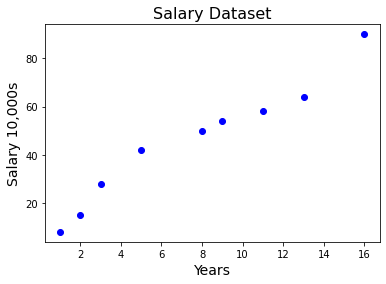

In [0]:
# Plot Salary vs Years
fig, ax = plt.subplots()
ax.scatter(salary_df["yr_Exp"], salary_df["salary"], c="b")
plt.title("Salary Dataset", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Salary 10,000s", fontsize=14)
plt.show()

Find the slope ($\beta_1$)

In [0]:
beta_1 = np.sum(salary_df["(x-xAvg)(y-yAvg)"])/np.sum(salary_df["(x-xAvg)^2"])
print("The slope of the line is : ",beta_1)

The slope of the line is :  4.799588900308325


Find the intercept ($\beta_0$)

In [0]:
beta_0 = np.mean(salary_df["salary"]) - beta_1*np.mean(salary_df["yr_Exp"])
print("The intercept of the line is : ",beta_0)
print("\nSo the Linear Equation is y = {0:0.2f}x + {1:0.2f}".format(beta_1,beta_0))

The intercept of the line is :  9.180883864337105

So the Linear Equation is y = 4.80x + 9.18


**Plot the best fit line**

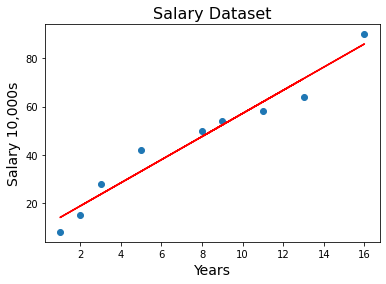

In [0]:
# Some dummy data
x = salary_df["yr_Exp"]
y = salary_df["salary"]

# Find the slope and intercept of the best fit line

# Create a list of values in the best fit line
ols_predictions = [beta_1 * i + beta_0 for i in x]

# Plot the best fit line over the actual values
plt.scatter(x,y)
plt.plot(x, ols_predictions, 'r')
plt.title("Salary Dataset", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Salary 10,000s", fontsize=14)
plt.show()

## Normal Equation Method (Analytical Solution)

<br>
\begin{equation*}
\beta = (X^TX)^{-1}(X^TY)
\end{equation*}
<br>
In the above equation,<br>
$\beta$ : hypothesis parameters that define it the best.<br>
X : Input feature value of each instance.<br>
Y : Output value of each instance.  
<br>


<br>
let's start with the simple case first. Consider the following simple linear regression function:

\begin{align}
y_i & =\beta_0+\beta_1x_i+\epsilon_i&\;\;\;\;\;\;\; \text for\;\; i=1, ... , n
\end{align}
<br>
If we actually let i = 1, ..., n, we see that we obtain n equations:


\begin{align}
y_1  & =\beta_0+\beta_1x_1+\epsilon_1\\
y_2  & =\beta_0+\beta_1x_2+\epsilon_2\\
\vdots\\
y_n  & = \beta_0+\beta_1x_n+\epsilon_n\\
\end{align}


<br>
<br>


\begin{equation}
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n\\
\end{bmatrix}_{n \times 1}
\begin{gathered}
=
&
\end{gathered}
\begin{bmatrix}
1 & x_1\\
1 & x_2\\
\vdots&\vdots\\
1&x_n
\end{bmatrix}_{n \times 2}
\begin{gathered}
*
&
\end{gathered}
\begin{bmatrix}
\beta_0\\
\beta_1\\
\end{bmatrix}_{2 \times 1}
\begin{gathered}
&
+
&
\end{gathered}
\begin{bmatrix}
\epsilon_1\\
\epsilon_2\\
\vdots\\
\epsilon_n\\
\end{bmatrix}_{n \times 1}
\end{equation}
<br>
<br>
\begin{gathered}
Y = X\beta + \varepsilon 
\end{gathered}

<br>


<p>Now, what does this statement mean? Well, here's the answer:</p>

- $X$  is an n × 2 matrix.
- $Y$ is an n × 1 column vector.
- $\beta$ is a 2 × 1 column vector of parameters.
- $\varepsilon$ denotes n × 1 column vector of residuals.
- The matrix $X$ and vector $\beta$ are multiplied together using the techniques of *matrix multiplication*.
- And, the vector $X\beta$ is added to the vector $\varepsilon$ using the techniques of *matrix addition*.


#### Background work
<br>
<br>
1.
<br>
\begin{align}
&\sum_{i=0}^n \varepsilon^T.\varepsilon = \sum_{i=0}^n \varepsilon^2 &\text{how 
??}\\
\end{align}

<br>
\begin{equation}
\varepsilon =\begin{bmatrix}
\epsilon_1\\
\epsilon_2\\
\vdots\\
\epsilon_n 
\end{bmatrix}_{n \times 1}
\begin{gathered}
,
&
\end{gathered}
\varepsilon^T=\begin{bmatrix}
\epsilon_1 & 
\epsilon_2 &\ldots&\epsilon_n 
\end{bmatrix}_{1 \times n}
\end{equation}
<br>

\begin{align}
&\sum_{i=0}^n \varepsilon^T.\varepsilon = \epsilon_1^2 + \epsilon_2^2 + ... +\epsilon_n^n\\
&\sum_{i=0}^n \varepsilon^T.\varepsilon = \sum_{i=0}^n \varepsilon^2
\end{align}


<br>
<br>
2.
<br>

\begin{align}
&\frac{\partial (\beta^T.X^T.X.\beta)}{\partial \beta} = \frac{\partial (\beta^T.A.\beta)}{\partial \beta} \;\;\;\text{where A is $X^T.X$}\\
&\text {By Rule}\\
&\\
&\frac{\partial (\beta^T.A.\beta)}{\partial \beta} = \beta^T.(A+A^T)\\
&\text {So}\\
&\\
&\frac{\partial (\beta^T.X^T.X.\beta)}{\partial \beta} = \beta^T.(X^T.X + (X^T.X)^T)\\
&\frac{\partial (\beta^T.X^T.X.\beta)}{\partial \beta} =\beta^T.(X^T.X + X^T.X)\\
&\frac{\partial (\beta^T.X^T.X.\beta)}{\partial \beta} =2\;\beta^T.X^T.X\\
\end{align}



================================================================================

<br>
<br>
$$
\begin{gathered}
Y = X\beta + \varepsilon 
\end{gathered}
$$
<p> Here \(\varepsilon\) denotes n * 1 vector of residuals.
\begin{gathered}
\varepsilon = Y - X\beta   \\
\end{gathered}
</p>
<p>We denotes transposition of matrices by $(^T)$</p>

\begin{equation}
\varepsilon =\begin{bmatrix}
\epsilon_1\\
\epsilon_2\\
\vdots\\
\epsilon_n 
\end{bmatrix}_{n \times 1}
\begin{gathered}
,
&
\end{gathered}
\varepsilon^T=\begin{bmatrix}
\epsilon_1 & 
\epsilon_2 &\ldots&\epsilon_n 
\end{bmatrix}_{1 \times n}
\end{equation}

<br>

\begin{align}
&\text{In least squared residual approach for the bivariate linear regression}\\
&\text{model, First, we calculate the sum of squared residuals and,second,}\\
&\text{find a set of estimators that minimize the sum. Thus, the minimizing}\\
&\text{problem of the sum of the squared residuals in matrix form is}\\
\end{align}

<br>

\begin{align}
{S(\beta)} & = \sum_{i=0}^n \varepsilon^2 = \sum_{i=0}^n \varepsilon^T.\varepsilon\\\\
& = (Y - X\beta)^T.(Y - X\beta)\\\\
& = (Y^T - \beta^TX^T).(Y - X\beta)\\\\
& = Y^T.Y - Y^T.X.\beta - \beta^T.X^T.Y + \beta^T.X^T.X.\beta \\\\
\end{align}

<br>
$$
\begin{align}
&\text{Since $\beta^T.X^T.Y$ is a 1*1 matrix i.e. scalar, always symmetric,}\\
&\text{so we can replace it with its transpose}\\\\
&\text{$ (\beta^T.X^T.Y)^T = (X^T.Y)^T.\beta = Y^T.X.\beta$}\\
\end{align}
$$
<br>
\begin{align}
& = Y^T.Y - Y^T.X.\beta - Y^T.X.\beta + \beta^T.X^T.X.\beta \\\\
{S(\beta)} & = Y^T.Y - 2\;Y^T.X.\beta + \beta^T.X^T.X.\beta \\
\end{align}
<br>
$$
\begin{align}
&\text{The minimum of $S(\beta)$ is obtained by taking the derivatives of}\\ 
&\text{$S(\beta)$ with $\beta$ and further equating the derivative to 0}\\
\end{align}
$$
<br>
\begin{align}
\frac{\partial {S(\beta)}}{\partial \beta} & = 0 - 2\;Y^T.X + \frac{\partial (\beta^T.X^T.X.\beta)}{\partial \beta} = 0\\\\
&-2\;Y^T.X + 2\;\beta^T.X^T.X = 0\\\\
&\beta^T.X^T.X = Y^T.X\\\\
&\beta^T.(X^T.X) = Y^T.X\\\\
&(\beta^T.(X^T.X))^T = (Y^T.X)^T\\\\
&(X^T.X)^T.\beta = (X^T.Y)\\\\
&(X^T.X).\beta = (X^T.Y)\\\\
&(X^T.X)^{-1}.(X^T.X).\beta = (X^T.X)^{-1}.(X^T.Y)\\
\\
&\mathbf{\beta = (X^T.X)^{-1}.(X^T.Y)}\\
\end{align}




Let's find out $\beta$ :
<br>
<br>
\begin{align}
\beta = (X^T.X)^{-1}.(X^T.Y)\tag{7}\\\\
\end{align}

Lets' take this equation further
\begin{equation}
X^T.X =\begin{bmatrix}
1 & 1 & \dots & 1\\
x_1 & x_2 & \dots & x_n\\ 
\end{bmatrix}_{2 \times n}
\begin{gathered}
.
&
\end{gathered}
\begin{bmatrix}
1 & x_1\\
1 & x_2\\
\vdots&\vdots\\
1 & x_n\\ 
\end{bmatrix}_{n \times 2}\\
\end{equation}

\begin{equation}
X^T.X =\begin{bmatrix}
\sum 1 & \sum x_i\\
\sum x_i & \sum x_i^2 \\ 
\end{bmatrix}
\end{equation}

<br>

\begin{equation}
\text{As if     }A =\begin{bmatrix}
a & b\\
c & d\\ 
\end{bmatrix}
\begin{gathered}
&
\end{gathered}
\text{then   }A^{-1} = \frac {1}{|A|}\begin{bmatrix}
d & -b\\
-c & a\\ 
\end{bmatrix}
\end{equation}
<br>
\begin{equation}
\text{So    }A^{-1} =\frac {1}{ab-bc}\begin{bmatrix}
d & -b\\
-c & a\\ 
\end{bmatrix}
\end{equation}
<br>
Now we will be applying this formula on $(X^T.X)^{-1}$

\begin{equation}
(X^T.X)^{-1} = \frac {1}{n\sum x_i^2 - n^2\bar x^2}\begin{bmatrix}
\sum x_i^2 & -n\bar x\\
-n\bar x & n\\ 
\end{bmatrix}
\end{equation}

\begin{equation}
(X^T.X)^{-1} = \frac {1}{n(\sum x_i^2 - n\bar x^2)}\begin{bmatrix}
\sum x_i^2 & -n\bar x\\
-n\bar x & n \tag{8}\\ 
\end{bmatrix}
\end{equation}

\begin{equation}
X^T.Y =\begin{bmatrix}
1 & 1 & \dots & 1\\
x_1 & x_2 & \dots & x_n\\ 
\end{bmatrix}_{2 \times n}
\begin{gathered}
.
&
\end{gathered}
\begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_n\\ 
\end{bmatrix}_{n \times 1}
\end{equation}

\begin{equation}
X^T.Y =\begin{bmatrix}
\sum y_i\\
\sum x_iy_i\tag{9}\\ 
\end{bmatrix}
\begin{gathered}
=
\end{gathered}
\begin{bmatrix}
n \bar y\\
\sum x_iy_i\tag{9}\\ 
\end{bmatrix}
\end{equation}

<br>
So as per equation 7, 8 and 9
<br>
\begin{align}
\beta = (X^T.X)^{-1}.(X^T.Y)
\end{align}
<br>
\begin{equation}
\beta = \frac {1}{n(\sum x_i^2 - n\bar x^2)}\begin{bmatrix}
\sum x_i^2 & -n\bar x\\
-n\bar x & n
\end{bmatrix}
\begin{gathered}
.
\end{gathered}
\begin{bmatrix}
n \bar y\\
\sum x_iy_i\\
\end{bmatrix}
\end{equation}
<br>
\begin{equation}
\beta = \frac {1}{n(\sum x_i^2 - n\bar x^2)}\begin{bmatrix}
n \bar y \sum x_i^2 - n\bar x \sum x_iy_i\\
-n^2\bar x \bar y + n \sum x_i y_i
\end{bmatrix}
\end{equation}
<br>
\begin{equation}
\beta = \frac {1}{(\sum x_i^2 - n\bar x^2)}\begin{bmatrix}
\bar y \sum x_i^2 - \bar x \sum x_iy_i\\
\sum x_i y_i-n\bar x \bar y
\end{bmatrix}
\end{equation}
<br>
\begin{equation}
\beta = \frac {1}{(\sum x_i^2 - n\bar x^2)}\begin{bmatrix}
\bar y \sum x_i^2 - n\bar y \bar x^2 + n\bar y \bar x^2 - \bar x \sum x_iy_i\\
\sum x_i y_i - n\bar x \bar y - n\bar x \bar y + n\bar x \bar y\\
\end{bmatrix}
\end{equation}
<br>
\begin{equation}
\beta = \frac {1}{(\sum x_i^2 - n\bar x^2)}\begin{bmatrix}
\bar y (\sum x_i^2 - n\bar x^2) - \bar x(\sum x_iy_i - n\bar y \bar x)\\
\sum x_i y_i - \sum x_i \bar y - \bar x \sum y_i + n\bar x \bar y\\
\end{bmatrix}
\end{equation}
<br>
\begin{equation}
\beta = \frac {1}{(\sum x_i^2 + n\bar x^2- 2 n\bar x^2)}\begin{bmatrix}
\bar y (\sum x_i^2 - n\bar x^2) - \bar x(\sum x_iy_i - n\bar y \bar x - n\bar y \bar x + n\bar y \bar x)\\
\sum x_i y_i - \sum x_i \bar y - \bar x \sum y_i + n\bar x \bar y\\
\end{bmatrix}
\end{equation}
<br>
\begin{equation}
\beta = \frac {1}{(\sum x_i^2 + n\bar x^2- 2 \bar x \sum x_i)}\begin{bmatrix}
\bar y (\sum x_i^2 - n\bar x^2) - \bar x(\sum x_iy_i - \sum y_i \bar x - \bar y \sum x_i + n\bar y \bar x)\\
\sum x_i y_i - \sum x_i \bar y - \bar x \sum y_i + n\bar x \bar y\\
\end{bmatrix}
\end{equation}
<br>
\begin{equation}
\beta = \frac {1}{\sum (x_i^2 + \bar x^2- 2 \bar x x_i)}\begin{bmatrix}
\bar y (\sum x_i^2 - n\bar x^2) - \bar x(\sum (x_iy_i - y_i \bar x - \bar y x_i + \bar y \bar x))\\
\sum (x_i y_i - x_i \bar y - \bar x  y_i + \bar x \bar y)\\
\end{bmatrix}
\end{equation}
<br>
\begin{equation}
\beta = \frac {1}{\sum (x_i - \bar x)^2}\begin{bmatrix}
\bar y (\sum x_i^2 - n\bar x^2) - \bar x(\sum (x_i - \bar x)(y_i - \bar y))\\
\sum (x_i - \bar x)(y_i - \bar y)\\
\end{bmatrix}
\end{equation}
<br>
\begin{equation}
\beta = \begin{bmatrix}
\bar y  - \bar x\beta_1\\
\beta_1\\
\end{bmatrix}
\end{equation}
<br>
Note $(\sum x_i^2 - n\bar x^2)$ is equal to $\sum(x_i - \bar x)^2$ and $\beta_1 = \frac{\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$.
<br>

\begin{equation}
\beta = \begin{bmatrix}
\beta_0\\
\beta_1 \tag{10}\\
\end{bmatrix}
\end{equation}

###Linear Regression Using Normal Equation Method

In [0]:
# Create Normal Equation Function
def NormalEquation(X,Y):
    beta = np.linalg.inv(X.T @ X) @ (X.T @ Y)
    return beta

In [0]:
# Scenario-1: np.newaxis might come in handy when you want to explicitly convert a 1D array to either a row vector or a column vector, as depicted in the above picture.

# Example:

# # 1D array
# In [7]: arr = np.arange(4)
# In [8]: arr.shape
# Out[8]: (4,)

# # make it as row vector by inserting an axis along first dimension
# In [9]: row_vec = arr[np.newaxis, :]     # arr[None, :]
# In [10]: row_vec.shape
# Out[10]: (1, 4)

# # make it as column vector by inserting an axis along second dimension
# In [11]: col_vec = arr[:, np.newaxis]     # arr[:, None]
# In [12]: col_vec.shape
# Out[12]: (4, 1)

In [0]:
X = np.array([np.ones(len(salary_df["yr_Exp"])), salary_df["yr_Exp"]]).T
Y = salary_df["salary"][:, np.newaxis]

In [0]:
X

array([[ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  5.],
       [ 1., 13.],
       [ 1.,  8.],
       [ 1., 16.],
       [ 1., 11.],
       [ 1.,  1.],
       [ 1.,  9.]])

In [0]:
Y

array([[15],
       [28],
       [42],
       [64],
       [50],
       [90],
       [58],
       [ 8],
       [54]])

####Compute $\beta_0$ and $\beta_1$

In [0]:
NormalEquation(X,Y)

array([[9.18088386],
       [4.7995889 ]])

## Numerical Approximation Using Gradient Descent

### What are the Loss & Cost functions: 
The loss function *computes the error for a single training example* while the cost function is the *average of the loss functions of the entire training set*. 

In Andrew Ng's words-
"Finally, the loss function was defined with respect to a single training example. It measures *how well you're doing on a single training example*. I'm now going to define something called *the cost function, which measures how well you're doing an entire training set.*"


##Gradient Descent  
###Gradient Descent is the process of minimizing a function by following the gradients of the cost function.  

###This involves *knowing the form of the cost as well as the derivative so that from a given point you know the gradient and can move in that direction*, e.g. downhill towards the minimum value.  

###In this optimization algorithm, each training instance is shown to the model one at a time. The model makes a prediction for a training instance, the error is calculated and the model is updated in order to reduce the error for the next prediction. This process is repeated for a fixed number of iterations.

###This procedure can be used to find the set of coefficients in a model that result in the smallest error for the model on the training data. Each iteration, the coefficients $\beta$ in machine learning language are updated using the equation:  

$\beta = \beta - learning\_rate * error * x$  

Where 
- $\beta$ is the coefficient or weight being optimized, 
- learning_rate is a step size (e.g. 0.01), 
- error is the prediction error for the model on the training data attributed to the weight, 
- and x is the input value.  





<br>
$$
\begin{align}
\hat y_i = \beta_0 + \beta_1 x_i
\end{align}
$$
<br>

$\hat y_i$ is the predicted value of $y_i$ for input value of $x_i$.
<br>
<br>
Cost function $J(\beta_0,\beta_1)$ = $\frac {1}{2 n}\sum_{i=1}^n (\hat y_i - y_i)^2$
<br>
<br>
Our goal is to minimize cost function $J(\beta_0,\beta_1)$ for $\beta_0$ and $\beta_1$.
<br>
<br>
\begin{align}
&\frac {\partial J(\beta_0,\beta_1)}{\partial \beta_0} = \frac {\partial (\frac {1}{2n} \sum (\beta_0+\beta_1x_i - y_i)^2)}{\partial \beta_0}\\\\
&\frac {\partial J(\beta_0,\beta_1)}{\partial \beta_0} = \frac {1}{2n} .2 \sum (\beta_0+\beta_1x_i - y_i).\frac {\partial (\beta_0 + \beta_1.x_i - y_i)}{\partial \beta_0}\\\\
&\frac {\partial J(\beta_0,\beta_1)}{\partial \beta_0} = \frac {1}{n}\sum (\beta_0+\beta_1x_i - y_i)\\\\
&\frac {\partial J(\beta_0,\beta_1)}{\partial \beta_0} = \frac {1}{n}\sum (\hat y_i - y_i)\tag{11}\\\\
&\frac {\partial J(\beta_0,\beta_1)}{\partial \beta_1} = \frac {\partial (\frac {1}{2n} \sum (\beta_0+\beta_1x_i - y_i)^2)}{\partial \beta_1}\\\\
&\frac {\partial J(\beta_0,\beta_1)}{\partial \beta_1} = \frac {1}{2n} .2 \sum (\beta_0+\beta_1x_i - y_i).\frac {\partial (\beta_0 + \beta_1.x_i - y_i)}{\partial \beta_1}\\\\
&\frac {\partial J(\beta_0,\beta_1)}{\partial \beta_1} = \frac {1}{n}\sum (\beta_0+\beta_1x_i - y_i)(0 + x_i- 0 )\\\\
&\frac {\partial J(\beta_0,\beta_1)}{\partial \beta_1} = \frac {1}{n}\sum (\hat y_i - y_i)x_i\tag{12}\\
\end{align}

Using equation 11 and 12 Gradient Descent algorithm can be defined as  
<br>

repeat until convergence  {
<br>
<br>
$\beta_j  = \beta_j - \alpha.\frac {\partial J(\beta_0,\beta_1)}{\partial \beta_j}$
<br>
for j = 0, 1 
<br>
<br>
}
<br>
Here $\alpha$ is a learning rate.
<br>
<br>
repeat until convergence  {
<br>
<br>
$\beta_0  = \beta_0 - \alpha.\frac {1}{n}\sum (\hat y_i - y_i)$
<br>
$\beta_1  = \beta_1 - \alpha.\frac {1}{n}\sum (\hat y_i - y_i)x_i$
<br>
<br>
$\beta_0$ and $\beta_1$ should be updated simultaneously.
<br>
<br>
}

###Linear Regression Using Gradient Descent

In [0]:
# y = b1x + b0
# b1 is slope, b0 is y-intercept

def compute_cost_for_line_given_points(b0, b1, points):
    totalError = 0
    
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (b1 * x + b0)) ** 2
    return totalError / (2*float(len(points)))

In [0]:
def step_gradient(b0_current, b1_current, points, learningRate):
    b0_gradient = 0
    b1_gradient = 0
    N = float(len(points))

    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b0_gradient += -(2/N) * (y - ((b1_current * x) + b0_current))
        b1_gradient += -(2/N) * x * (y - ((b1_current * x) + b0_current))
    new_b0 = b0_current - (learningRate * b0_gradient)
    new_b1 = b1_current - (learningRate * b1_gradient)
    return [new_b0, new_b1]

In [0]:
def gradient_descent(points, starting_b0, starting_b1, learning_rate, num_iterations):
    b0 = starting_b0
    b1 = starting_b1
    cost_history = np.zeros(num_iterations)  # create a vector to store the cost history
    for i in range(num_iterations):
        cost_history[i] = compute_cost_for_line_given_points(b0, b1, points) # compute and record the cost
        b0, b1 = step_gradient(b0, b1, points, learning_rate)

    return [b0, b1], cost_history

In [0]:
salary_df.head()

,yr_Exp,salary,(x-xAvg),(y-yAvg),(x-xAvg)(y-yAvg),(x-xAvg)^2
0,2,15,-5.555556,-30.444444,169.135802,30.864198
1,3,28,-4.555556,-17.444444,79.469136,20.753086
2,5,42,-2.555556,-3.444444,8.802469,6.530864
3,13,64,5.444444,18.555556,101.024691,29.641975
4,8,50,0.444444,4.555556,2.024691,0.197531


In [0]:
points = np.ones(shape=(len(salary_df["yr_Exp"]), 2))

points[:, 0] = salary_df["yr_Exp"]
points[:, 1] = salary_df["salary"]

In [0]:
points.shape

(9, 2)

### Find Beta Parameters (Slope and Intercept)

In [0]:
learning_rate = 0.008
initial_b0 = np.random.randn(1,1)*0.01
initial_b1 = np.random.randn(1,1)*0.01
num_iterations = 2000

print("Starting gradient descent at b0 = {0}, b1 = {1}, error = {2}".format(initial_b0, initial_b1, compute_cost_for_line_given_points(initial_b0, initial_b1, points)))
print("Running...")

Starting gradient descent at b0 = [[0.00234444]], b1 = [[-0.00512454]], error = [[1325.18933439]]
Running...


In [0]:
[b0, b1], _ = gradient_descent(points, initial_b0, initial_b1, learning_rate, num_iterations)

print("After {0} iterations b0 = {1}, b1 = {2}, error = {3}".format(num_iterations, b0, b1, compute_cost_for_line_given_points(b0, b1, points)))

After 2000 iterations b0 = [[9.18018115]], b1 = [[4.7996546]], error = [[13.62864002]]


###Gradient Descent with Different Learning Rates
Notice how the smaller the learning rate takes more iterations to minimize the cost function

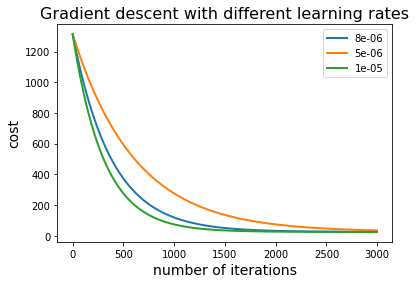

In [0]:
num_iterations = 3000
learning_rates = [0.000008, 0.000005, 0.00001]

initial_b0 = np.random.randn(1,1)*0.01
initial_b1 = np.random.randn(1,1)*0.01

for lr in learning_rates:
    _, cost_history = gradient_descent(points, initial_b0, initial_b1, lr, num_iterations)
    plt.plot(cost_history, linewidth=2)

plt.title("Gradient descent with different learning rates", fontsize=16)
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.legend(list(map(str, learning_rates)))

#### Large Learning Rate
If we use too large value of a learning rate then the cost function may never converge to a minimum

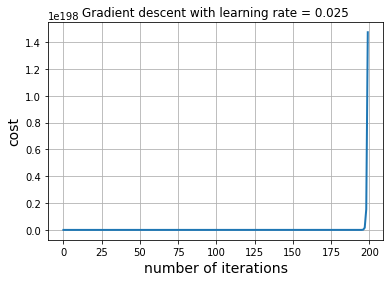

In [0]:
learning_rate = 0.025
num_iterations = 200

initial_b0 = np.random.randn(1,1)*0.01
initial_b1 = np.random.randn(1,1)*0.01

_, cost_history = gradient_descent(points, initial_b0, initial_b1, learning_rate, num_iterations)

plt.plot(cost_history, linewidth=2)
plt.title("Gradient descent with learning rate = " + str(learning_rate), fontsize=12)
plt.xlabel("number of iterations", fontsize=14)
plt.ylabel("cost", fontsize=14)
plt.grid()
plt.show()

###Linear Regression Using Sklearn

In [0]:
cost_history

array([1.33117004e+003, 1.25052886e+004, 1.19260013e+005, 1.13914398e+006,
       1.08826082e+007, 1.03966797e+008, 9.93246598e+008, 9.48898124e+009,
       9.06529826e+010, 8.66053275e+011, 8.27384001e+012, 7.90441310e+013,
       7.55148111e+014, 7.21430752e+015, 6.89218873e+016, 6.58445255e+017,
       6.29045678e+018, 6.00958792e+019, 5.74125986e+020, 5.48491264e+021,
       5.24001132e+022, 5.00604485e+023, 4.78252498e+024, 4.56898527e+025,
       4.36498010e+026, 4.17008377e+027, 3.98388955e+028, 3.80600891e+029,
       3.63607063e+030, 3.47372010e+031, 3.31861852e+032, 3.17044222e+033,
       3.02888200e+034, 2.89364243e+035, 2.76444132e+036, 2.64100903e+037,
       2.52308799e+038, 2.41043213e+039, 2.30280635e+040, 2.19998606e+041,
       2.10175669e+042, 2.00791327e+043, 1.91825995e+044, 1.83260966e+045,
       1.75078365e+046, 1.67261117e+047, 1.59792909e+048, 1.52658157e+049,
       1.45841971e+050, 1.39330128e+051, 1.33109038e+052, 1.27165721e+053,
       1.21487772e+054, 1

In [0]:
# Import Linear Regression Model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
# Find the Intercept Parameter (B0)
lr.intercept_

array([9.18088386])

In [0]:
# Find the Coefficient Parameter (B1)
lr.coef_

array([[0.       , 4.7995889]])